In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

Get data

In [ ]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


No. of rows and columns

In [ ]:
df.shape

(150, 5)

Information about data like data types and missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


No missing values

In [ ]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

No. of duplicated values = 3

In [ ]:
df.duplicated().sum()

3

drop it

In [ ]:
df.drop_duplicates(inplace=True)

Observations

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.species.value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

Data Visualization

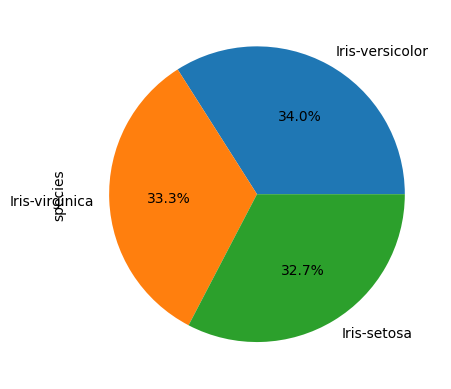

In [ ]:
df['species'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

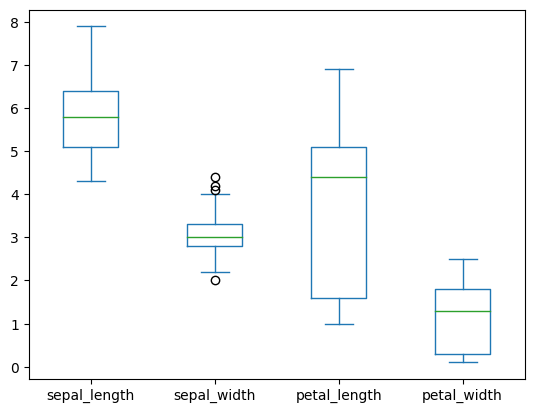

In [ ]:
df.plot(kind='box');

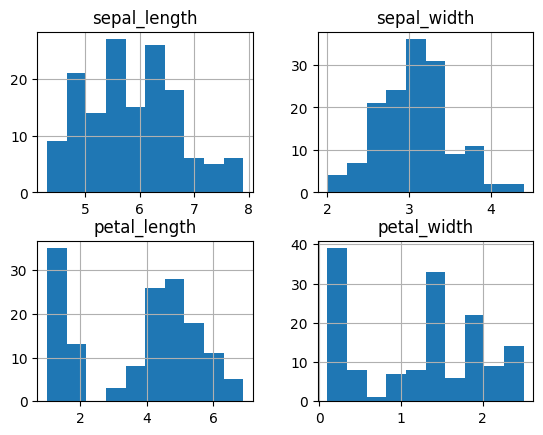

In [ ]:
df.hist();

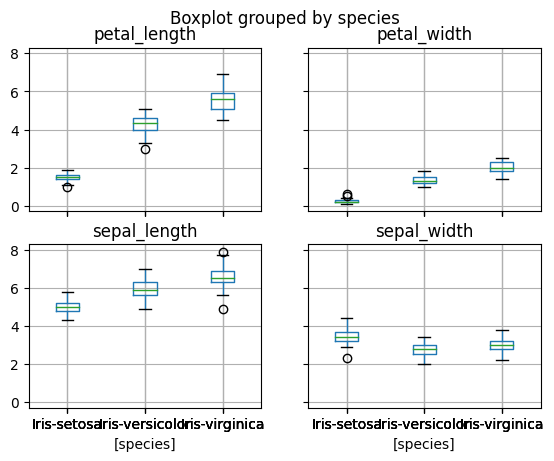

In [ ]:
df.boxplot(by="species");

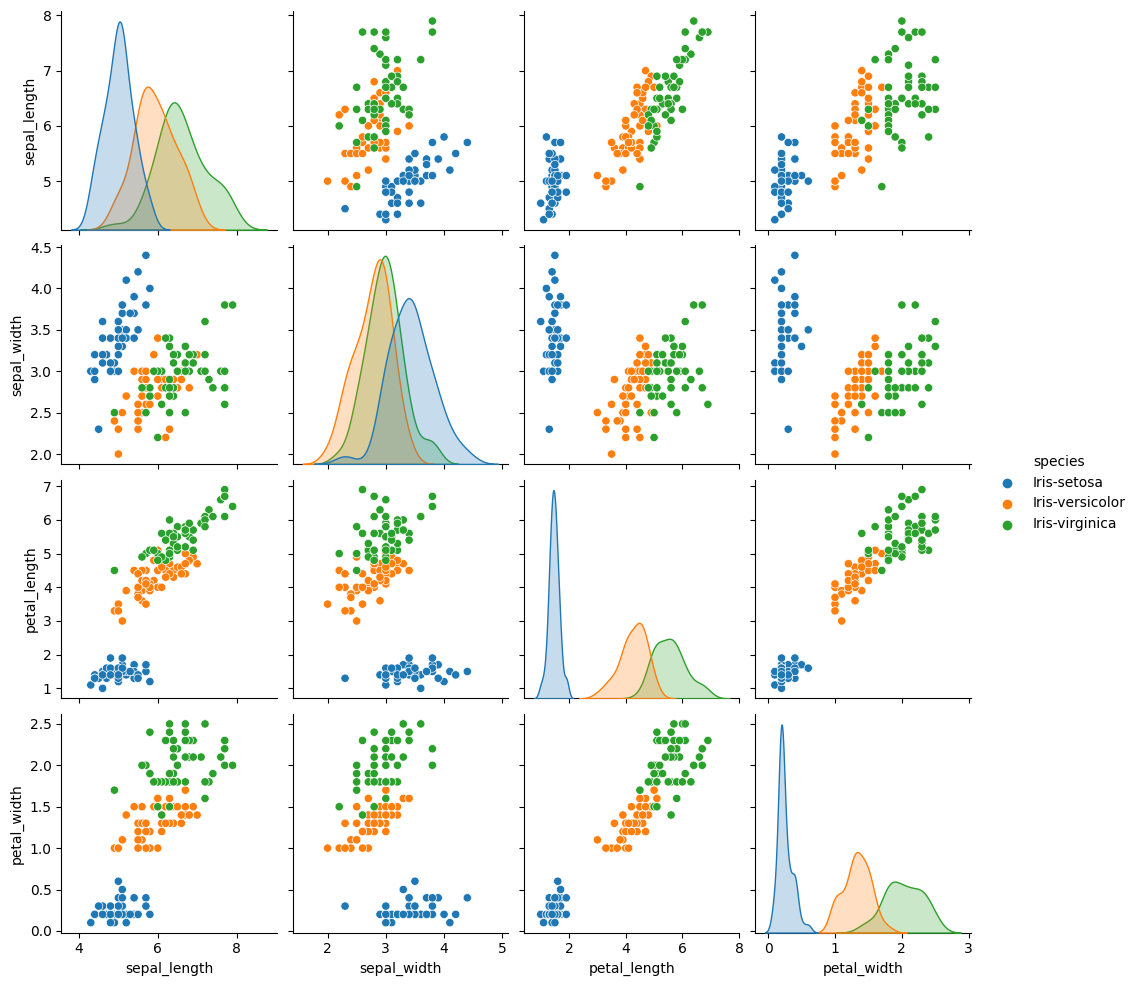

In [ ]:
sns.pairplot(df, hue="species");

In [ ]:
X = df.drop(['species'],axis='columns')
y = df.species

Mapping to convert categorical data to numerical " for modeling"

In [ ]:
mapp={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
y=y.map(mapp).astype(int)

Data Spliting

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

**ML**

In [ ]:
from sklearn.linear_model import LogisticRegression ,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier

In [ ]:
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'Random Forest': RandomForestClassifier(),
         'Gradient Boosting Classifier':GradientBoostingClassifier(),
         'Support Vector Machine': SVC(),
         'Stochastic Gradien Descent': SGDClassifier(),
         'Naive Bayes': GaussianNB(),
         'xgb Classifier': XGBClassifier()}

In [ ]:
def fit_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = cross_val_score(model,
                                             X_test,
                                             y_test,
                                            scoring='accuracy',
                                            cv=3
                                            ).mean()

    return model_scores

Decision Tree and xgb Classifier won


In [ ]:
model_scores = fit_score(models,X_train,X_test,y_train,y_test)

model_scores

{'Logistic Regression': 0.9,
 'KNN': 0.9,
 'Decision Tree': 1.0,
 'Random Forest': 0.9666666666666667,
 'Gradient Boosting Classifier': 1.0,
 'Support Vector Machine': 0.9333333333333332,
 'Stochastic Gradien Descent': 0.8000000000000002,
 'Naive Bayes': 0.9,
 'xgb Classifier': 1.0}

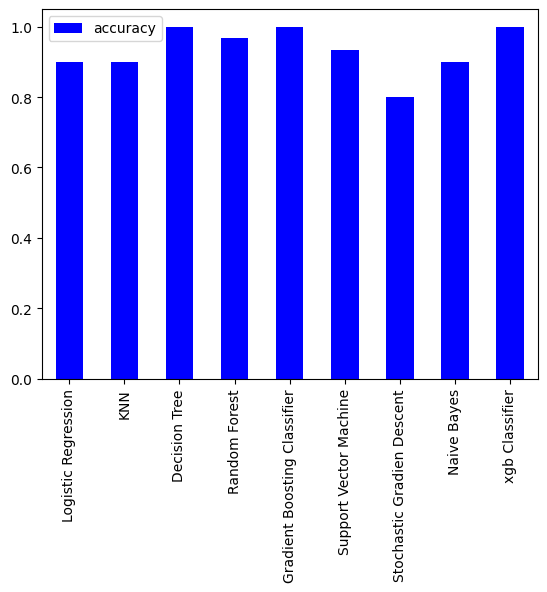

In [ ]:
models = pd.DataFrame(model_scores, index=["accuracy"])
models.T.plot.bar(color="blue");

**Decision Tree**

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)

<Axes: >

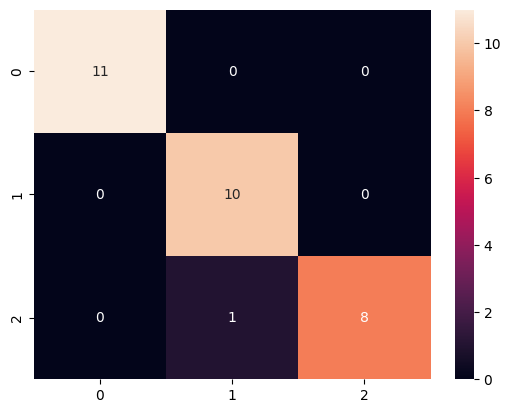

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred1)) , annot=True)

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      1.00      0.95        10
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



**XGB Classifier** (The best model)

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)

<Axes: >

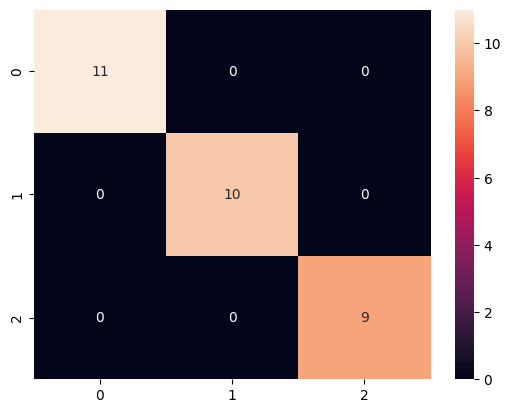

In [ ]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred1)) , annot=True)

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**hyperparameter tuning for random forest**

In [ ]:
np.random.seed(18)
params = {"n_estimators": [50,100,200, 300,400 ] ,
 "max_depth": [ 3,5,7,9,10],
 "max_features" : [ 'auto', 'sqrt', 'log2']}


rs = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=params,
                                cv=3,
                                n_iter=100,
                                verbose=1,
                              refit=True,
                                n_jobs=-1
                               )

rs.fit(X_train, y_train)

rs.best_params_

Fitting 3 folds for each of 75 candidates, totalling 225 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 75 is smaller than n_iter=100. Running 75 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'n_estimators': 50, 'max_features': 'auto', 'max_depth': 9}

In [ ]:
rs.best_estimator_

RandomForestClassifier(max_depth=9, max_features='auto', n_estimators=50)

In [ ]:
rs.best_score_

0.9658119658119658

In [ ]:
rs.score(X_test, y_test)

1.0

In [ ]:
model = RandomForestClassifier(n_estimators= 50, max_features= 'auto', max_depth= 3)
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


<Axes: >

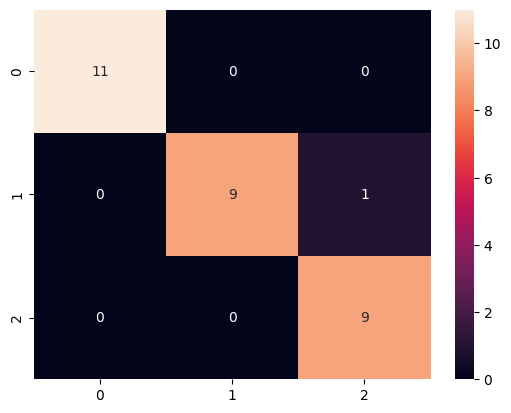

In [ ]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred1)) , annot=True)

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

